<a href="https://colab.research.google.com/github/mueller14003/cse480-notebooks/blob/master/04_2_NFA_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports first, then the Assignment (7 Tasks)


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 25.35 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_e

# Task 1: Design an NFA for $\{0,1\}^* 1 0$ ("Ends 10")

## It will be a 3-state NFA.

## Name the states I, S0, and F.

### Document each line of your Jove code with a short comment.


In [2]:
# SOLUTION

nfaEnds10 = md2mc('''

NFA 

I : 0 | 1 -> I
I : 1 -> S0
S0 : 0 -> F

''')

Generating LALR tables


# Task 2: Determine States in Animation

Put the above NFA in animation, and note down the set of states attained
after the DFA has seen every character in 10010. More detailed instructions follow.

In [4]:
AnimateNFA(nfaEnds10, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

1 : {I, S0}
<br>
0 : {I, F}
<br>
0 : {I}
<br>
1 : {I, S0}
<br>
0 : {I, F}


## Execute the cell below and follow the bulleted instructions:

* When the animation pane comes up, type in 10010 and click Animate

* Then click the ">|" button, which is for single-stepping

* Note down the results as you single-step, and fill answers in 1b(ii) below


In [5]:
AnimateNFA(nfaEnds10, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

In [13]:
accepts_nfa(nfaEnds10, "10010", chatty=True)

States reached =  {'S0', 'I'}
States reached =  {'F', 'I'}
States reached =  {'I'}
States reached =  {'S0', 'I'}
States reached =  {'F', 'I'}
NFA accepts '10010' by reaching {'F', 'I'}


True

## Provide these answers based on single-stepping the animation (please type in a SET OF STATES - else no credit). 

## Also say whether a token dropped out of the diagram (with the move on a symbol being undefined) and whether the state reached is final. 

### SET of states before consuming any of 10010 = {I}
#### NONE OF THESE (retain what apply)

### SET of states AFTER consuming "1" and before consuming "0010"  = {I, S0}
#### NONE OF THESE (retain what apply)

### SET of states AFTER consuming "10" and before consuming "010"  = {I, F}
#### The SET of states reached is FINAL

### SET of states AFTER consuming "100" and before consuming "10"  = {I}
#### A Token Dropped Out

### SET of states AFTER consuming "1001" and before consuming "0"  = {I, S0}
#### NONE OF THESE (retain what apply)

### SET of states AFTER consuming "10010" entirely  = {I, F}
#### The SET of states reached is FINAL

# Task 3: Convert the NFA to a DFA and answer questions

Convert the NFA to a DFA by the command below, and answer the questions below.

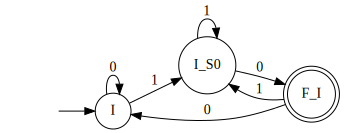

In [6]:
dotObj_dfa(nfa2dfa(nfaEnds10, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

#### State DFA is in after 10010 = F_I

The DFA starts at I, goes to I_S0, then to F_I, then back to I, then to I_S0, and finally lands on F_I.

#### Set of states NFA is in after 10010 (last ans of 1b(ii) ) = {I, F}

This is essentially the same as the DFA.

#### Do the above match? Recall that for an NFA set of states (A,B), a DFA state may be named A_B or B_A. We use "match" in this sense.

Yes, they do.

#### Reason that the above should match? Please provide a sentence stating when a DFA accepts and when an NFA accepts in terms of its tokens being in many states that includes a final state.

They should match because they are the same...<br>
A DFA accepts when the final state lands on F.<br>
A NFA accepts when the set of states for the final state contains F.

# Task 4: Design an NFA for $\{\varepsilon, 0\}$ 
### It will be a 2-state NFA with an IF state and a final state (call that final state "F2" )

In [18]:
nfaEps0 = md2mc('''
NFA 
IF : 0 -> IF
IF : " -> F2
''')
# I am unsure whether this is right or wrong...

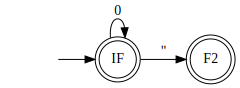

In [19]:
dotObj_nfa(nfaEps0)

# A tutorial on Concatenating NFA

Watch this video, then do Task 5.

To watch the video separately in Youtube in large size, 
visit https://youtu.be/VWyOT1uYfIc

Otherwise just run the command below!

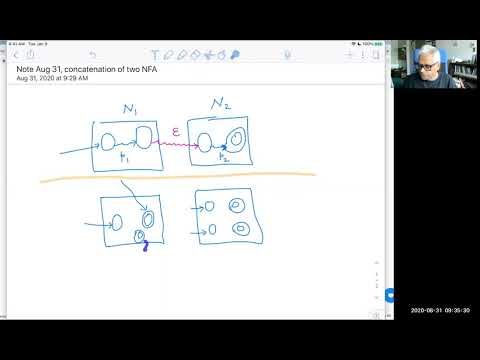

In [43]:
# NFA Concatenation
from IPython.display import YouTubeVideo
YouTubeVideo('VWyOT1uYfIc')

# Task 5: Develop a Concatenation NFA

## Concatenate nfaEnds10 and nfaEps0 to obtain NFAEnds10Eps0.

### Follow the steps in the above video.

### Describe the steps in a few bullets below, then finish the notebook code cell that defines NFAEnds10Eps0 below where space is provided for your work.


# Show the full Concatenation NFA below


In [49]:
# Here is the resulting NFA

NFAEnds10Eps0 = md2mc('''
NFA 

!!---- Put NFA 1's transitions below, 
!!----  after suitably renaming states to make final states non-final etc.
 
I : 0 | 1 -> I
I : 1 -> S0
S0 : 0 -> S1

!!--- put the "bridge" transition below
 
S1 : " -> IF

!!--- put NFA 2's transitions below, again after suitable state renamings as above

IF : 0 -> IF
IF : " -> F2

''')
# I'm not sure if this is correct...

## Draw the concat NFA and convert to a DFA

... Run the THREE commands below, and then move on to do Task 6 
... based on the results you observe from these commands.


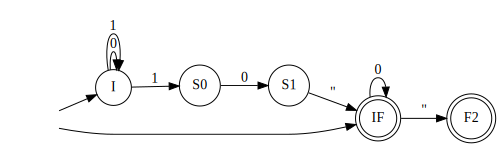

In [50]:
# command-1
dotObj_nfa(NFAEnds10Eps0)

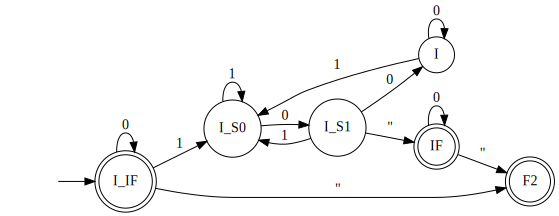

In [51]:
# command-2

dotObj_dfa(nfa2dfa(NFAEnds10Eps0, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

In [52]:
# Let us see its internal representation -- this may give you hints for doing Task 6.

# command-3

NFAEnds10Eps0

{'Delta': {('I', '0'): {'I'},
  ('I', '1'): {'I', 'S0'},
  ('IF', '"'): {'F2'},
  ('IF', '0'): {'IF'},
  ('S0', '0'): {'S1'},
  ('S1', '"'): {'IF'}},
 'F': {'F2', 'IF'},
 'Q': {'F2', 'I', 'IF', 'S0', 'S1'},
 'Q0': {'I', 'IF'},
 'Sigma': {'"', '0', '1'}}

# Task 6: Explain the NFA2DFA algorithm

Below, you must explain the states of the DFA that resulted from converting the
NFA to DFA using subset construction. 

You must look at the results of running command-1, command-2, and command-3 in your explanation.

For each question, your answer must be in the following form:

* Currently the NFA is in a *set* of states, say S1. That is already an E-closed state. That is where the DFA begins its operation (in the corresponding DFA state).

* Let S1 be {s11, s12} for example. (Notice the use of upper and lower cases.)

* Consider a '0' transition

* Upon a '0', s11 went to set of states S11, s12 went to set of states S12, and so on.

* I performed E-Closure of the states in S11 and that resulted in S11c. (If E-closure did not generate any new states, say "E-Closure did not generate any new state.")

* Similarly, I performed E-Closure of the states in S12 and that resulted in S12c

* Then I unioned S11c and S12c and called it S2

* S2 is now an E-closed set of states

* Thus, I arrive at a single NFA state corresponding to 
  - S1 going upon '0' to S2 (and the DFA now has a state corresponding to S2).

 
## QUESTIONS FOR YOU TO ANSWER IN THE ABOVE MANNER

# **I am so lost... I may need help to better understand this, because it's just not clicking for me.**

### Looking at the NFA NFAEnds10Eps0, why did state I arise in the DFA?

* The state I arises in the DFA because...

### Why did state A1_I arise in the DFA?

* State A1_I arises in the DFA because...

### Why did F3_I_T1 arise (mention E-closure steps)

* F3_I_T1 arises because...

### Explain in detail why A1_I went upon a '0' to F3_I_T1 (include all the E-closure steps)

* A1_I went upon a '0' to F3_I_T1 because...

### Why did F2_I arise?

* F2_I arose because...

# Task 7: Brzozowski's minimization

This is a DFA minimization algorithm that shows you that a bloated DFA can be minimized simply by following these steps, as explained in Section 7.7. In this problem, you will practice these steps on an initially bloated DFA given to you.

The steps are these:

1. Reverse the given DFA, say DFA_bloated, to obtain an NFA called NFA1 (use the rev_dfa function)

2. Determinize NFA1 to obtain a DFA called DFA2

3. Reverse DFA2 to obtain another NFA, say NFA2

4. Determinize NFA2 to obtain the final minimized DFA, say DFA_min

The problem asks you to apply this procedure to minimize DFA_bloated.



In [26]:
# This is a slight variant of Figure 6.7's bloated DFA 

DFA_bloated = md2mc('''

DFA

IS1: a -> Temp
IS1: b -> FS3

Temp: a -> FS2
Temp: b -> FS3

FS2: a -> S4
FS2: b -> S5

FS3: a -> S5
FS3: b -> S4

S4: a|b -> FS6
S5: a|b -> FS6

FS6: a|b -> FS6

''')

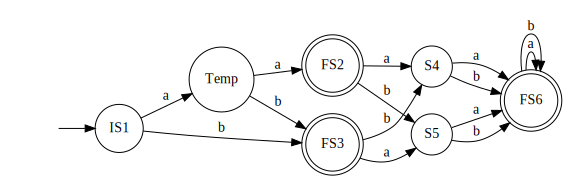

In [27]:
dotObj_dfa(DFA_bloated)

## Show the result of reversing the above DFA

In [28]:
help(rev_dfa)

Help on function rev_dfa in module jove.Def_NFA:

rev_dfa(D)
    In : D = a partially consistent DFA without any unreachable states.
    Out: A consistent NFA whose language is D's language reversed.



### The reverse invocation

In [29]:
# Reverse DFA_bloated here

NFA1 =  rev_dfa(DFA_bloated)

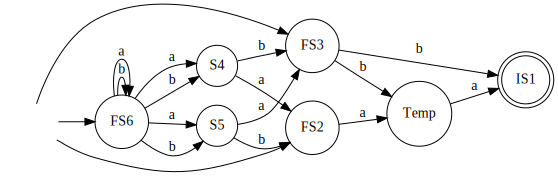

In [30]:
dotObj_nfa(NFA1)

## Check that NFA1 is indeed the reverse of DFA_bloated by checking one string

Point out that "aabba" is in DFA_bloated's language but its reversal (i.e. "abbaa") is in NFA1's language

### Which path does abbaa take in being accepted by NFA1 ?

FS6 -> FS6 -> S5 -> FS2 -> Temp -> IS1

* Starting from State FS6

* The next state after 'a' is FS6

* The next state after 'b' is S5

* The next state after 'b' is FS2

* The next state after 'a' is Temp

* The next state after 'a' is IS1


## Determinize NFA1 to obtain DFA2

In [ ]:
help(nfa2dfa)

In [31]:
DFA2 = nfa2dfa(NFA1)

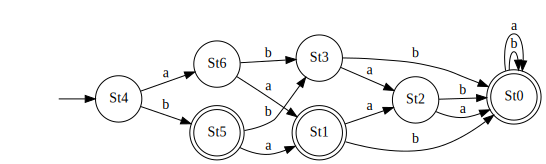

In [32]:
dotObj_dfa(DFA2)

## Reverse DFA2 to obtain NFA3

In [33]:
NFA3 = rev_dfa(DFA2)

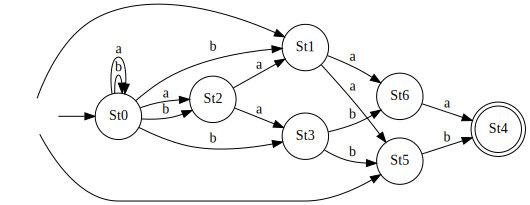

In [34]:
dotObj_nfa(NFA3)

## One more determinization, and we are done minimizing


In [35]:
DFA_min = nfa2dfa(NFA3)

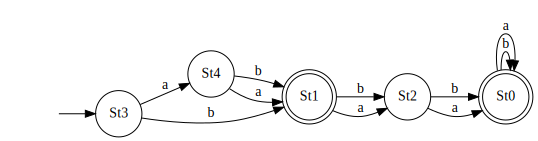

In [36]:
dotObj_dfa(DFA_min)

# Check that DFA_min and DFA_bloated have the same language but are not isomorphic

In [ ]:
help(langeq_dfa)

In [ ]:
help(iso_dfa)

In [37]:
langeq_dfa(DFA_min, DFA_bloated)

True

In [38]:
iso_dfa(DFA_min, DFA_bloated)

False

##  But DFA_min indeed is minimal as shown by the number of states of the standard DFA min algorithm

In [39]:
DFA_min_alt = min_dfa(DFA_bloated)

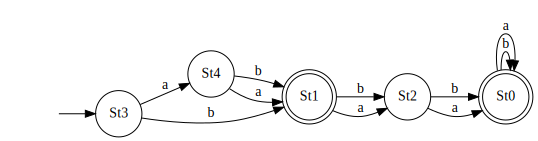

In [40]:
dotObj_dfa(DFA_min)

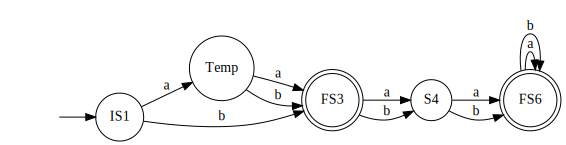

In [41]:
dotObj_dfa(DFA_min_alt)

In [ ]:
help(iso_dfa)

In [42]:
iso_dfa(DFA_min, DFA_min_alt)

True

# END of demonstration that DFA minimization can be done in two different ways

## Here are some notes to understand Brzozowski's method

* If you are given a DFA "D1", a minimal DFA for "reverse(D1)" is obtained by "reverse followed by determinize"

* But since we are interested in the minimal DFA for "D1" (and not reverse(D1)), we do these steps again!

* Hence the algorithm becomes "reverse THEN determinize THEN reverse THEN determinize"

I watched, read, studied, evaluated, and tested all the sections of this document.<br>
However, I got very confused with Task 6 and was unable to complete it.<br>
I may need some help to better understand the material.